# Development and analysis of computation model for prediction of meterological parameters


Meterology is the scientific study of the atmosphere that focus on weather process and forecasting.

Weather forecasting is the application of current technology and science to predict the state of the atmosphere for a future time and a given location.

Weather Forecasting is highly complex, multi-dimensional, dynamic and complicated process because it involves many entities of the atmosphere as well as many concepts of atmospheric physics.

# Computation model for prediction
### 1) Regression Analysis
### 2) ANN Approach

# Objective:
to build the model to predict the meteorlogical parameters like mean-temperature.

# Data Collection
Department of Hydrology and Meteorology, Ministry of Energy, Water Resources and Irrigation

Weather station: (2008-2017)
1. Ktm airport ( Temp, Humidity, Rainfall)

# Tools Used
## Numpy, Pandas, Matplot, SkLearn




loading Weather DATA

In [1]:
import pandas as pd # importing panda 
df = pd.read_csv('final_data.csv').set_index('date')  #loading Data and set index as date

In [3]:
#Display Data
df.head()

,meantempm,meantempm_1,meantempm_2,meantempm_3,maxtempm,mintempm,maxtempm_1,mintempm_1,maxtempm_2,mintempm_2,maxtempm_3,mintempm_3,precipm_1,precipm_2,precipm_3,humidity_1,humidity_2,humidity_3
date,,,,,,,,,,,,,,,,,,
1/1/2008,10.80,10.80,10.80,10.80,20.3,1.3,20.3,1.3,20.3,1.3,20.3,1.3,0.0,0.0,0.0,100.0,100.0,100.0
1/2/2008,12.25,10.80,10.80,10.80,22.2,2.3,20.3,1.3,20.3,1.3,20.3,1.3,0.0,0.0,0.0,100.0,100.0,100.0
1/3/2008,12.00,12.25,10.80,10.80,22.0,2.0,22.2,2.3,20.3,1.3,20.3,1.3,0.0,0.0,0.0,100.0,100.0,100.0
1/4/2008,10.95,12.00,12.25,10.80,20.9,1.0,22.0,2.0,22.2,2.3,20.3,1.3,0.0,0.0,0.0,96.8,100.0,100.0
1/5/2008,11.00,10.95,12.00,12.25,22.2,-0.2,20.9,1.0,22.0,2.0,22.2,2.3,0.0,0.0,0.0,95.2,96.8,100.0


In [4]:
df.describe()

,meantempm,meantempm_1,meantempm_2,meantempm_3,maxtempm,mintempm,maxtempm_1,mintempm_1,maxtempm_2,mintempm_2,maxtempm_3,mintempm_3,precipm_1,precipm_2,precipm_3,humidity_1,humidity_2,humidity_3
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,19.683311,19.683009,19.682640,19.682256,26.448658,12.917963,26.448740,12.917278,26.448686,12.916594,26.448384,12.916128,4.083488,4.083488,4.083488,83.665389,83.659584,83.663226
std,5.094307,5.094800,5.095396,5.096011,4.380177,6.416987,4.380059,6.418093,4.380134,6.419199,4.380520,6.419980,10.760063,10.760063,10.760063,11.453783,11.509080,11.512146
min,6.750000,6.750000,6.750000,6.750000,10.000000,-2.000000,10.000000,-2.000000,10.000000,-2.000000,10.000000,-2.000000,0.000000,0.000000,0.000000,13.400000,-13.400000,-13.400000
25%,15.100000,15.100000,15.100000,15.100000,23.175000,7.275000,23.175000,7.275000,23.175000,7.275000,23.175000,7.275000,0.000000,0.000000,0.000000,76.875000,76.875000,76.875000
50%,21.050000,21.050000,21.050000,21.050000,27.600000,13.400000,27.600000,13.400000,27.600000,13.400000,27.600000,13.400000,0.000000,0.000000,0.000000,85.300000,85.300000,85.300000
75%,24.350000,24.350000,24.350000,24.350000,30.000000,19.400000,30.000000,19.400000,30.000000,19.400000,30.000000,19.400000,2.000000,2.000000,2.000000,93.000000,93.000000,93.000000
max,28.350000,28.350000,28.350000,28.350000,35.200000,22.400000,35.200000,22.400000,35.200000,22.400000,35.200000,22.400000,115.500000,115.500000,115.500000,100.000000,100.000000,100.000000


### Linear Regression using Ordinary Least Squares

Linear regression aims to apply a set of assumptions primary regarding linear relationships and numerical techniques to predict an outcome (Y, aka dependent variable) based off of one or more predictors (X's independent variables) with the end goal of establishing a model (mathematical formula) to predict outcomes given only predictor values with some amount of uncertainty.

The generalized formula for a Linear Regression model is:

$$\hat{y} = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ... + \beta_{(p-n)} * x_{(p-n)} + \epsilon$$

where:

  * $\hat{y}$ is the predicted outcome variable (dependent variable)
  * $x_j$ are the predictor variables (independent variables) for j = 1,2,..., p-1 parameters
  * $\beta_0$ is the intercept or the value of $\hat{y}$ when each $x_j$ equals zero
  * $\beta_j$ is the change in $\hat{y}$ based on a one unit change in one of the corresponding $x_j$
  * $\epsilon$ is a random error term associated with the difference between the predicted $\hat{y}_i$ value and the actual $y_i$ value



## Selecting Appropriate Features for a Model
### Pearson correlation coefficient

assumption required by the linear regression technique --> linear relationship between the dependent variable and each independent variable.

One way to assess the linearity between the independent variable, which for now will be the mean temperature, and the other independent variables is to calculate the Pearson correlation coefficient.

The Pearson correlation coefficient (r) is a measurement of the amount of linear correlation between equal length arrays which outputs a value ranging -1 to 1. 


| Correlation Value | Interpretation |
|-------------------|----------------|
| 0.8 - 1.0         | Very Strong    |
| 0.6 - 0.8         | Strong         |
| 0.4 - 0.6         | Moderate       |
| 0.2 - 0.4         | Weak           |
| 0.0 - 0.2         | Very Weak      |


To assess the correlation in this data I will call the `corr()` method of the Pandas DataFrame object.

In [2]:
df.corr()[['meantempm']].sort_values('meantempm')

,meantempm
humidity_1,-0.418339
humidity_2,-0.404892
humidity_3,-0.395516
precipm_1,0.265970
precipm_2,0.283283
precipm_3,0.295210
maxtempm_3,0.856131
maxtempm_2,0.864541
maxtempm_1,0.882675
maxtempm,0.916647


removing the features that have correlation values less than the absolute value of 0.6.

In [5]:
predictors = ['meantempm_1',  'meantempm_2',  'meantempm_3', 
              'mintempm_1',   'mintempm_2',   'mintempm_3',
              'maxtempm_1',   'maxtempm_2',   'maxtempm_3']
df2 = df[['meantempm'] + predictors]

### Getting a Visual of the Relationships

looking at visuals to assess and verify patterns.
graphing each of these selected predictors to prove that there is in fact a linear relationship. 

matplotlib's pyplot module and scatter_plot()

dependent variable( meantempm) --> y axis along all of the 9 predictor variables plots. 


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

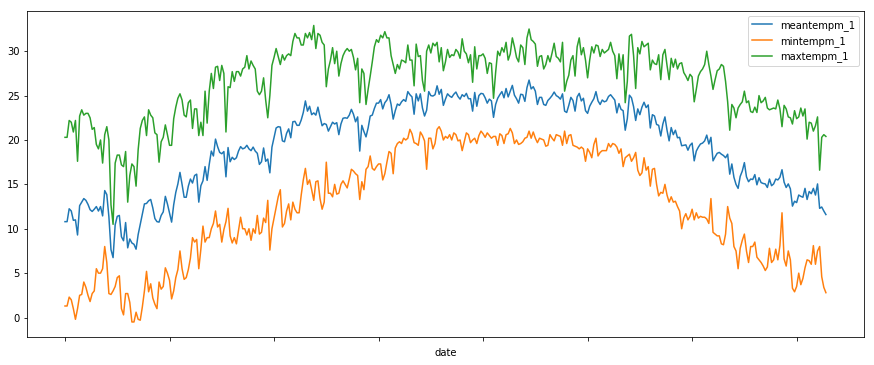

In [7]:
cols=['meantempm_1', 'mintempm_1', 'maxtempm_1' ]
df[cols][:365].plot(figsize=(15, 6))
plt.show()

<h1>Scatter Plot for VISUALIZATION Of Data</h1>

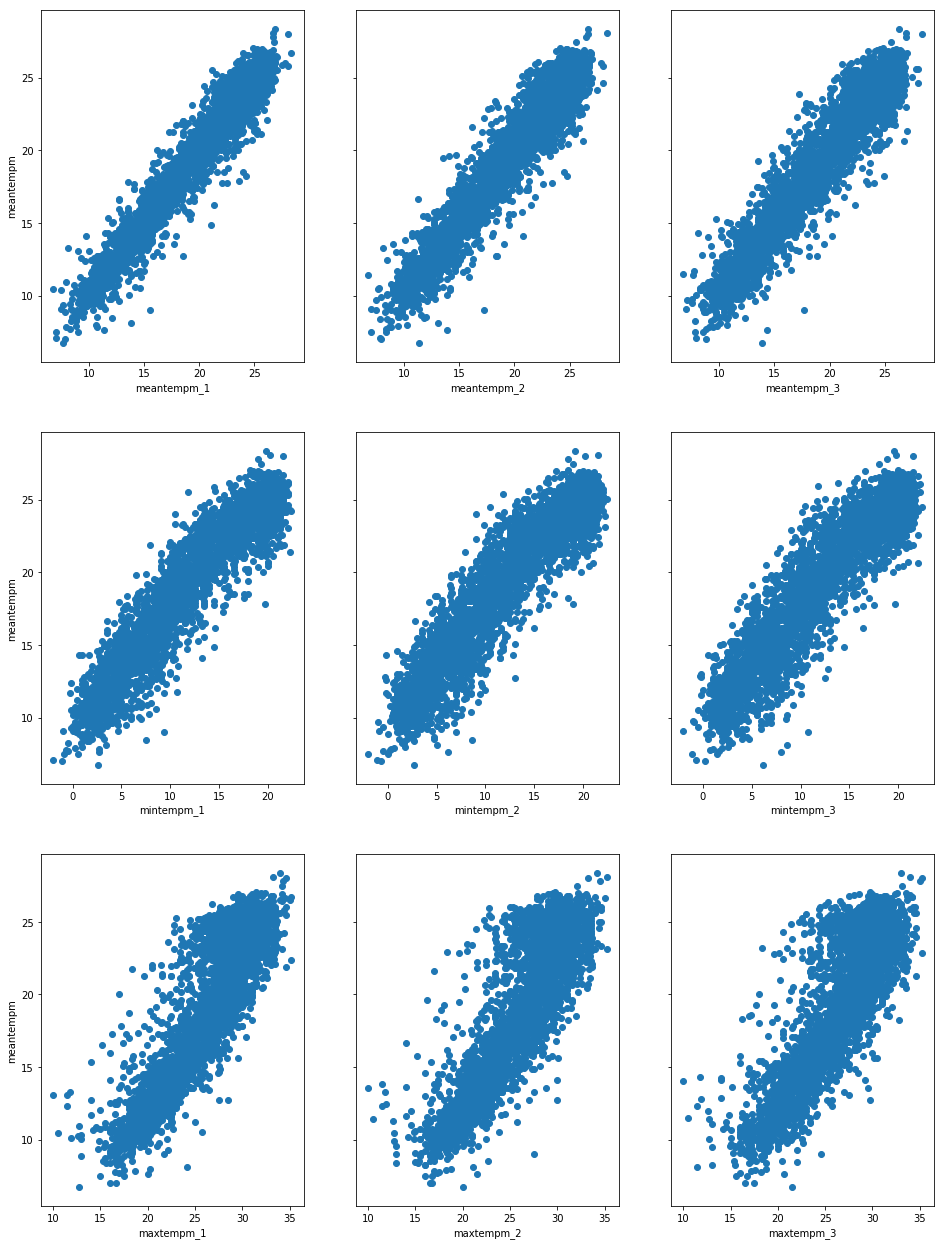

In [8]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(3, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['meantempm'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='meantempm')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

All the remaining predictor variables show a good linear relationship with the meantempm. 

### Using Step-wise Regression to Build a Model

Backward Elimination works as follows:
1. Select a significance level $\alpha$ for which you test your hypothesis against to determine if a variable should stay in the model
2. Fit the model with all predictor variables
3. Evaluate the p-values of the $\beta_j$ coefficients and for the one with the greatest p-value, if p-value > $\alpha$ progress to step 4, if not you have your final model
4. Remove the predictor identified in step 3
5. Fit the model again but, this time without the removed variable and cycle back to step 3


In [10]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]
y = df2['meantempm']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)
X.iloc[:5, :5]

,const,meantempm_1,meantempm_2,meantempm_3,mintempm_1
date,,,,,
1/1/2008,1.0,10.80,10.80,10.80,1.3
1/2/2008,1.0,10.80,10.80,10.80,1.3
1/3/2008,1.0,12.25,10.80,10.80,2.3
1/4/2008,1.0,12.00,12.25,10.80,2.0
1/5/2008,1.0,10.95,12.00,12.25,1.0


In [11]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        10:55:58   Log-Likelihood:                -5480.5
No. Observations:                3652   AIC:                         1.098e+04
Df Residuals:                    3645   BIC:                         1.102e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8110      0.152      5.352      0.000       0.514       1.108
meantempm_1     0.2351      0.006     41.064      0.000       0.224       0.246
meantempm_2     0.0419      0.007      5.935      0.000       0.028       0.056
meantempm_3     0.0477      0.006      8.252      0.000       0.036       0.059
mintempm_1      0.2291      0.011     20.590      0.000       0.207       0.251
mintempm_2      0.0670      0.013      5.076      0.000       0.041       0.093
mintempm_3      0.0505      0.011      4.645      0.000       0.029       0.072
maxtempm_1      0.2411      0.008     28.895      0.000       0.225       0.257
maxtempm_2      0.0168      0.010      1.723      0.085      -0.002       0.036
maxtempm_3      0.0449      0.008      5.319      0.000       0.028       0.061
==============================================================================
Omnibus:                      410.615   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1224.766
Skew:                          -0.592   Prob(JB):                    1.11e-266
Kurtosis:                       5.578   Cond. No.                     6.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h1>Some Tools to analysis the model summary</h1>

1.	P>|t| - this is the p-value using to evaluate the hypothesis test. This value we are going to use to determine whether to eliminate a variable in this step-wise backward elimination technique.
2.	R-squared - a measure that states how much of the overall variance in the outcome our model can explain
3.	Adj. R-squared - the same as R-squared but, for multiple linear regression this value has a penalty applied to it based off the number of variables being included to explain the level of overfitting.


In [12]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that maxtempm_3 has the greatest p-value and that it is
#             greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('maxtempm_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        10:56:31   Log-Likelihood:                -5480.5
No. Observations:                3652   AIC:                         1.098e+04
Df Residuals:                    3645   BIC:                         1.102e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8110      0.152      5.352      0.000       0.514       1.108
meantempm_1     0.2351      0.006     41.064      0.000       0.224       0.246
meantempm_2     0.0419      0.007      5.935      0.000       0.028       0.056
meantempm_3     0.1375      0.020      6.829      0.000       0.098       0.177
mintempm_1      0.2291      0.011     20.590      0.000       0.207       0.251
mintempm_2      0.0670      0.013      5.076      0.000       0.041       0.093
mintempm_3      0.0056      0.016      0.355      0.722      -0.025       0.036
maxtempm_1      0.2411      0.008     28.895      0.000       0.225       0.257
maxtempm_2      0.0168      0.010      1.723      0.085      -0.002       0.036
==============================================================================
Omnibus:                      410.615   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1224.766
Skew:                          -0.592   Prob(JB):                    1.11e-266
Kurtosis:                       5.578   Cond. No.                     2.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

10 parameters has p-value grreater then alpha (0.005). We remove them

R-squared and Adj. R-squared values are both equal which suggests there is minimal risk that our model is being over fitted by excessive variables and (2) the value of 0.894 is interpreted such that our final model explains about 90% of the observed variation in the outcome variable, the meantempm.

In [13]:
X = X[['const','mintempm_1', 'mintempm_2', 'mintempm_3', 'maxtempm_1']]

In [14]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.858e+04
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        10:56:38   Log-Likelihood:                -5535.2
No. Observations:                3652   AIC:                         1.108e+04
Df Residuals:                    3647   BIC:                         1.111e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5532      0.136     11.412      0.000       1.286       1.820
mintempm_1     0.3702      0.013     27.927      0.000       0.344       0.396
mintempm_2     0.0954      0.016      5.963      0.000       0.064       0.127
mintempm_3     0.0647      0.013      4.899      0.000       0.039       0.091
maxtempm_1     0.4265      0.007     64.169      0.000       0.413       0.439
==============================================================================
Omnibus:                      345.722   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.036
Skew:                          -0.484   Prob(JB):                    3.62e-234
Kurtosis:                       5.475   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using SciKit-Learn's LinearRegression Module to Predict the Weather

we  use SciKit-Learn to create a prediction model and test its ability to predict the mean temperature. 
SciKit-Learn is a very well established machine learning library.

using SciKit-Learn to split our dataset into a testing and training sets by importing the `train_test_split()` function from `sklearn.model_selection` module. 

we will split the training and testing datasets into 80% training and 20% testing and assign a `random_state` of 12.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# first remove the const column
X = X.drop('const', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#print (X_train)

In [43]:
#print(X_test)

The next action to take is to build the regression model using the training dataset. To do this, will import and use the `LinearRegression` class from the `sklearn.linear_model` module.

scikit-learn implement a common `fit()` and `predict()` API across its numerous numerical techniques.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h1>Result of the Model</h1>

In [20]:
# make a prediction set using the test set
prediction = regressor.predict(X_test)
#print (prediction.size)
#print (pdate,":::",prediction[0])

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degress celcius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celcius" % median_absolute_error(y_test, prediction))

731
The Explained Variance: 0.95
The Mean Absolute Error: 0.82 degress celcius
The Median Absolute Error: 0.65 degrees celcius


<h1>Visualizing the Real Vs Prediction value</h1>

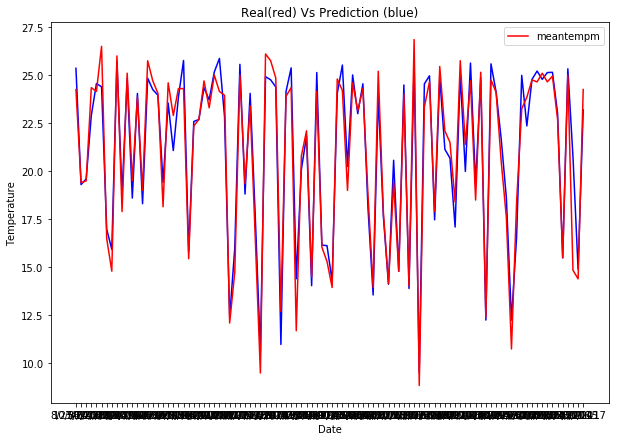

In [21]:
#y_test
#prediction.shape[0]
plt.figure(figsize=(10, 7))
plt.plot(prediction[:100], 'b-') #selecting only 100 values
plt.plot(y_test[:100], 'r-')     #selecting only 100 values
plt.legend(); plt.xlabel('Date'); plt.ylabel('Temperature')
plt.title('Real(red) Vs Prediction (blue)');

----

In [26]:
#print(y_test[1:5])
#prediction.iloc[:5]
#print(prediction[:5])